```python
from pandas import CategoricalDtype, read_csv, DataFrame
import pandas as pd
from math import floor, log10

_1 = {'I': 'uint16', 'T': 'uint8', 'Ro': CategoricalDtype(('T', 'D', 'S')), 'E': 'uint8', 'A': 'uint8', 'D': 'uint8',
      'Dm': 'uint16', 'H': 'uint16', 'M': 'uint16', 'Re': 'category'}
_2 = read_csv('teams/t.csv', usecols=_1, dtype=_1)
_2.dropna(inplace=True)
_2.reset_index(drop=True, inplace=True)
_4 = ('T', 1), ('D', 2), ('S', 2)
_5 = []
_6 = {_7: 0 for _7 in _1 if _7 not in {'I', 'T', 'Ro', 'Re'}}
for (_8, _9, _10), _11 in _2.groupby(['I', 'T', 'Re'], observed=True):
    _12 = _11['Ro'].value_counts()
    for _13, _14 in _4:
        for _ in range(_14 - _12.get(_13, 0)):
            _5.append(_6 | {'I': _8, 'T': _9, 'Ro': _13, 'Re': _10})
_2 = pd.concat([_2, DataFrame(_5).astype(_1, False)], ignore_index=True)
_2.sort_values(['Re', 'I', 'T', 'Ro'], inplace=True)
_2.reset_index(drop=True, inplace=True)
_2.drop(columns=['I', 'Re'], inplace=True)
_15 = {'T': _2['T'] - 1, 'Ro': _2['Ro'].cat.codes.astype('uint8', False)}
for _16 in _6:
    for _17 in range(floor(log10(_2[_16].max())), -1, -1):
        _18 = _2[_16] // 10 ** _17 % 10
        _15[f'{_16}{_17}'] = _18 if _18.dtype == 'uint8' else _18.astype('uint8', False)
_2 = DataFrame(_15)

```python
import pandas as pd
from pandas import CategoricalDtype, read_csv, DataFrame
from math import floor, log10

# 데이터 타입 정의
dtype_map = {
    'I': 'uint16',
    'T': 'uint8',
    'Ro': CategoricalDtype(('T', 'D', 'S')),  # Role
    'E': 'uint8',
    'A': 'uint8',
    'D': 'uint8',
    'Dm': 'uint16',
    'H': 'uint16',
    'M': 'uint16',
    'Re': 'category'  # Result
}

# CSV 파일 읽기
df = read_csv('teams/t.csv', usecols=dtype_map, dtype=dtype_map)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 역할별 최소 인원 요구사항 정의
role_requirements = {
    'T': 1,  # Tank
    'D': 2,  # Damage
    'S': 2  # Support
}

# 보완할 역할 데이터 생성
missing_rows = []
stat_columns = [col for col in dtype_map if col not in {'I', 'T', 'Ro', 'Re'}]

# 각 Index/Team/Result 조합에 대해 역할 개수 보완
for (index, team, result), group in df.groupby(['I', 'T', 'Re'], observed=True):
    role_counts = group['Ro'].value_counts()
    for role, required_count in role_requirements.items():
        missing_count = required_count - role_counts.get(role, 0)
        for _ in range(missing_count):
            row_data = {col: 0 for col in stat_columns}  # 스탯은 0으로 초기화
            row_data |= {'I': index, 'T': team, 'Ro': role, 'Re': result}
            missing_rows.append(row_data)

# 누락된 역할 행 추가 및 정렬
df = pd.concat([df, DataFrame(missing_rows).astype(dtype_map)], ignore_index=True)
df.sort_values(['Re', 'I', 'T', 'Ro'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(columns=['I', 'Re'], inplace=True)  # 이후 분석에 필요 없는 열 제거

# 숫자들을 각 자릿수별로 분해
encoded_data = {
    'T': df['T'] - 1,
    'Ro': df['Ro'].cat.codes.astype('uint8', copy=False)
}

for col in stat_columns:
    max_digits = floor(log10(df[col].max())) if df[col].max() > 0 else 0
    for digit_place in range(max_digits, -1, -1):
        digit_column = (df[col] // 10 ** digit_place) % 10
        encoded_data[f'{col}{digit_place}'] = digit_column.astype('uint8', copy=False)

# 최종 전처리된 데이터프레임
df_processed = DataFrame(encoded_data)

In [1]:
import pandas as pd
from pandas import CategoricalDtype, read_csv, DataFrame
from math import floor, log10

# 데이터 타입 정의
dtype_map = {
    'I': 'uint16',
    'T': 'uint8',
    'Ro': CategoricalDtype(('T', 'D', 'S')),  # Role
    'E': 'uint8',
    'A': 'uint8',
    'D': 'uint8',
    'Dm': 'uint16',
    'H': 'uint16',
    'M': 'uint16',
    'Re': 'category'  # Result
}

# CSV 파일 읽기
df = read_csv('teams/t.csv', usecols=dtype_map, dtype=dtype_map)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
# 역할별 최소 인원 요구사항 정의
role_requirements = {
    'T': 1,  # Tank
    'D': 2,  # Damage
    'S': 2  # Support
}

# 보완할 역할 데이터 생성
missing_rows = []
stat_columns = [col for col in dtype_map if col not in {'I', 'T', 'Ro', 'Re'}]

for index, group in df.groupby('I', observed=True):
    print(index)
    print(group)
    print()

1
      I  T Ro   E   A   D     Dm      H      M  Re
0     1  1  T   0   0   8   2947   1425   4611  De
1     1  1  D   1   0   3   1818      0    650  De
2     1  1  D   2   0   7   4735    487    308  De
3     1  1  S   1   0   3   2078   2748      0  De
4     1  1  S   1   1   3    269   5848    189  De
5     1  2  D  17   0   1   5906      0   1044   V
6     1  2  D  12   0   1   5907      0      0   V
7     1  2  S   8   6   0   2790   4794      0   V
8     1  2  S  10  13   0   2226   5556    208   V
9     1  2  T  17   4   0   4381      0   7181   V
4312  1  1  T  30   5  19  19702      0  26844  Dr
4313  1  1  D  43   0   9  14072      0      0  Dr
4314  1  1  D  56   2  18  29354   1959      0  Dr
4315  1  1  S  10  48  15    983  18277      0  Dr
4316  1  1  S  28  28  13   6948  18287      0  Dr
4317  1  2  T  55  14  13  24408   3060  14077  Dr
4318  1  2  D  47   6  18  18533   2069    360  Dr
4319  1  2  D  41   0  16  16157   2052      0  Dr
4320  1  2  S  17  36  12   3

In [4]:
from pandas import CategoricalDtype, read_csv

# 데이터 타입 정의
dtype_definition = {
    'I': 'uint16',
    'T': 'uint8',
    'Ro': CategoricalDtype(categories=('T', 'D', 'S')),
    'E': 'uint8',
    'A': 'uint8',
    'D': 'uint8',
    'Dm': 'uint16',
    'H': 'uint16',
    'M': 'uint16',
    'Re': 'category'
}

# 파일 경로 정의
file_path = 'teams/t.csv'

# CSV 파일 읽기
team_data = read_csv(file_path, usecols=dtype_definition, dtype=dtype_definition)
team_data

,I,T,Ro,E,A,D,Dm,H,M,Re
0,1,1,T,0,0,8,2947,1425,4611,De
1,1,1,D,1,0,3,1818,0,650,De
2,1,1,D,2,0,7,4735,487,308,De
3,1,1,S,1,0,3,2078,2748,0,De
4,1,1,S,1,1,3,269,5848,189,De
...,...,...,...,...,...,...,...,...,...,...
9008,466,2,T,17,3,8,7147,351,3898,De
9009,466,2,D,19,0,9,6344,0,847,De
9010,466,2,D,26,1,7,9108,150,165,De
9011,466,2,S,7,22,6,2734,8985,0,De


In [5]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   I       9013 non-null   uint16  
 1   T       9013 non-null   uint8   
 2   Ro      9012 non-null   category
 3   E       9013 non-null   uint8   
 4   A       9013 non-null   uint8   
 5   D       9013 non-null   uint8   
 6   Dm      9013 non-null   uint16  
 7   H       9013 non-null   uint16  
 8   M       9013 non-null   uint16  
 9   Re      9013 non-null   category
dtypes: category(2), uint16(4), uint8(4)
memory usage: 123.6 KB


In [6]:
team_data['Ro'].unique()

['T', 'D', 'S', NaN]
Categories (3, object): ['T', 'D', 'S']

In [19]:
%timeit team_data[team_data.notna()]

585 μs ± 6.45 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
%timeit 

132 μs ± 798 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
%timeit team_data[~team_data.isna()]

582 μs ± 10.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
type(

In [7]:
# Ro 값이 있는 데이터만 필터링
team_data = team_data[team_data['Ro'].notna()].reset_index(drop=True)
team_data['Ro'].unique()

['T', 'D', 'S']
Categories (3, object): ['T', 'D', 'S']

In [8]:
import pandas as pd
from pandas import DataFrame

# 필요한 Ro 개수
required_roles = ('T', 1), ('D', 2), ('S', 2)

# 누락된 역할을 채우기 위한 기본값 저장
default_fields = {col: 0 for col in dtype_definition if col not in {'I', 'T', 'Ro', 'Re'}}
missing_rows = []

# I, T, Re 단위로 그룹화 후 역할 부족 채우기
for (index, team, result), group in team_data.groupby(['I', 'T', 'Re'], observed=True):
    role_counts = group['Ro'].value_counts()
    for role, required_count in required_roles:
        missing_count = required_count - role_counts.get(role, 0)
        for _ in range(missing_count):
            row = default_fields | {'I': index, 'T': team, 'Ro': role, 'Re': result}
            missing_rows.append(row)

# 누락된 행 추가
df_filled = pd.concat([team_data, DataFrame(missing_rows).astype(dtype_definition)], ignore_index=True)
df_filled

,I,T,Ro,E,A,D,Dm,H,M,Re
0,1,1,T,0,0,8,2947,1425,4611,De
1,1,1,D,1,0,3,1818,0,650,De
2,1,1,D,2,0,7,4735,487,308,De
3,1,1,S,1,0,3,2078,2748,0,De
4,1,1,S,1,1,3,269,5848,189,De
...,...,...,...,...,...,...,...,...,...,...
9045,363,2,S,0,0,0,0,0,0,De
9046,363,2,S,0,0,0,0,0,0,De
9047,379,1,T,0,0,0,0,0,0,De
9048,396,1,T,0,0,0,0,0,0,V


In [9]:
df_filled.sort_values(['Re', 'I', 'T', 'Ro'], inplace=True)

In [11]:
df_filled.reset_index(drop=True, inplace=True)

,I,T,Ro,E,A,D,Dm,H,M,Re
0,1,1,T,0,0,8,2947,1425,4611,De
1,1,1,D,1,0,3,1818,0,650,De
2,1,1,D,2,0,7,4735,487,308,De
3,1,1,S,1,0,3,2078,2748,0,De
4,1,1,S,1,1,3,269,5848,189,De
...,...,...,...,...,...,...,...,...,...,...
9045,466,1,T,24,2,4,7538,711,4150,V
9046,466,1,D,17,1,6,7050,0,789,V
9047,466,1,D,21,0,8,6847,0,0,V
9048,466,1,S,14,10,9,6047,3032,652,V


In [6]:
# 정렬
df_filled = df_filled.sort_values(['Re', 'I', 'T', 'Ro']).reset_index(drop=True)
df_filled

,I,T,Ro,E,A,D,Dm,H,M,Re
0,1,1,T,0,0,8,2947,1425,4611,De
1,1,1,D,1,0,3,1818,0,650,De
2,1,1,D,2,0,7,4735,487,308,De
3,1,1,S,1,0,3,2078,2748,0,De
4,1,1,S,1,1,3,269,5848,189,De
...,...,...,...,...,...,...,...,...,...,...
9045,466,1,T,24,2,4,7538,711,4150,V
9046,466,1,D,17,1,6,7050,0,789,V
9047,466,1,D,21,0,8,6847,0,0,V
9048,466,1,S,14,10,9,6047,3032,652,V


In [7]:
df_filled.drop(columns=['I', 'Re'], inplace=True)
df_filled

,T,Ro,E,A,D,Dm,H,M
0,1,T,0,0,8,2947,1425,4611
1,1,D,1,0,3,1818,0,650
2,1,D,2,0,7,4735,487,308
3,1,S,1,0,3,2078,2748,0
4,1,S,1,1,3,269,5848,189
...,...,...,...,...,...,...,...,...
9045,1,T,24,2,4,7538,711,4150
9046,1,D,17,1,6,7050,0,789
9047,1,D,21,0,8,6847,0,0
9048,1,S,14,10,9,6047,3032,652


In [61]:
from math import floor, log10

# T는 0부터 시작하도록 조정, Ro는 코드화
expanded_df = DataFrame()
expanded_df['T'] = df_filled['T'] - 1
expanded_df['Ro'] = df_filled['Ro'].cat.codes.astype('uint8')

# 숫자 특성을 자리수 별로 나눔
for col in default_fields:
    max_val = df_filled[col].max()
    digits = floor(log10(max_val)) if max_val > 0 else 0
    for d in range(digits, -1, -1):
        expanded_df[f'{col}{d}'] = (df_filled[col] // 10 ** d % 10).astype('uint8')
expanded_df

,T,Ro,E1,E0,A1,A0,D1,D0,Dm4,Dm3,...,H4,H3,H2,H1,H0,M4,M3,M2,M1,M0
0,0,0,0,0,0,0,0,8,0,2,...,0,1,4,2,5,0,4,6,1,1
1,0,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,6,5,0
2,0,1,0,2,0,0,0,7,0,4,...,0,0,4,8,7,0,0,3,0,8
3,0,2,0,1,0,0,0,3,0,2,...,0,2,7,4,8,0,0,0,0,0
4,0,2,0,1,0,1,0,3,0,0,...,0,5,8,4,8,0,0,1,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,0,0,2,4,0,2,0,4,0,7,...,0,0,7,1,1,0,4,1,5,0
9046,0,1,1,7,0,1,0,6,0,7,...,0,0,0,0,0,0,0,7,8,9
9047,0,1,2,1,0,0,0,8,0,6,...,0,0,0,0,0,0,0,0,0,0
9048,0,2,1,4,1,0,0,9,0,6,...,0,3,0,3,2,0,0,6,5,2


In [62]:
expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9050 entries, 0 to 9049
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T       9050 non-null   uint8
 1   Ro      9050 non-null   uint8
 2   E1      9050 non-null   uint8
 3   E0      9050 non-null   uint8
 4   A1      9050 non-null   uint8
 5   A0      9050 non-null   uint8
 6   D1      9050 non-null   uint8
 7   D0      9050 non-null   uint8
 8   Dm4     9050 non-null   uint8
 9   Dm3     9050 non-null   uint8
 10  Dm2     9050 non-null   uint8
 11  Dm1     9050 non-null   uint8
 12  Dm0     9050 non-null   uint8
 13  H4      9050 non-null   uint8
 14  H3      9050 non-null   uint8
 15  H2      9050 non-null   uint8
 16  H1      9050 non-null   uint8
 17  H0      9050 non-null   uint8
 18  M4      9050 non-null   uint8
 19  M3      9050 non-null   uint8
 20  M2      9050 non-null   uint8
 21  M1      9050 non-null   uint8
 22  M0      9050 non-null   uint8
dtypes: uint8(23)


In [63]:
data_array = expanded_df.to_numpy()
data_array[0]

array([0, 0, 0, 0, 0, 0, 0, 8, 0, 2, 9, 4, 7, 0, 1, 4, 2, 5, 0, 4, 6, 1,
       1], dtype=uint8)

In [64]:
data_array.max(0) + 1

array([ 2,  3,  6, 10,  7, 10,  3, 10,  3, 10, 10, 10, 10,  3, 10, 10, 10,
       10,  4, 10, 10, 10, 10], dtype=uint8)

In [65]:
data_array.reshape(-1, 23 * 10)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 3, ..., 0, 3, 4],
       [0, 0, 4, ..., 8, 9, 5],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

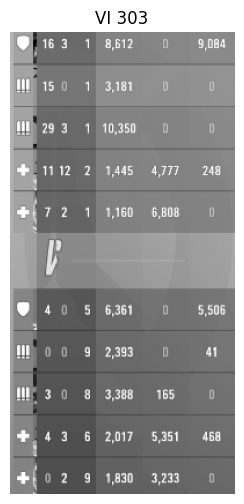

2025-10-15 03:08:47.560209: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.io import decode_png, read_file
import tensorflow as tf
from tensorflow.image import resize
from tensorflow.strings import split, upper, substr, to_number
from tensorflow import int32
from matplotlib.pyplot import figure, title, axis, imshow, show


def load_and_process_image(file_path):
    # PNG 파일을 로드하고 디코딩 (그레이스케일)
    image = decode_png(read_file(file_path), channels=1)

    # 관심 영역(Region of Interest) 자르기
    cropped = image[230:930, 530:1370]

    # 특정 열 부분을 추출하고 이어 붙이기
    columns = (
        cropped[:, :40],  # 왼쪽 여백
        cropped[:, 390:420],  # 문자 1
        cropped[:, 450:480],  # 문자 2
        cropped[:, 500:530],  # 문자 3
        cropped[:, 570:640],  # 문자 4
        cropped[:, 670:740],  # 문자 5
        cropped[:, 770:]  # 오른쪽 여백
    )
    combined = tf.concat(columns, axis=1)  # 가로 방향으로 이어 붙이기

    # 크기 조정 (400x400), 비율 유지
    resized = resize(combined, size=(400, 400), preserve_aspect_ratio=True)

    # 파일 이름에서 메타데이터 추출
    filename_parts = split(file_path, '/')[-1]  # 경로에서 파일 이름만 추출
    parts = split(filename_parts, '_')
    label_str = upper(substr(parts[0], 0, 2))  # 첫 두 글자를 대문자로 변환 (예: 라벨 코드)
    number = to_number(split(parts[1], '.')[0], out_type=int32)  # 숫자 부분 추출 및 정수형 변환

    return resized, label_str, number


def visualize_batch(images, labels, numbers):
    figure(figsize=(6, 6))
    title(f'{labels[0].numpy().decode()} {numbers[0]}')  # 첫 번째 이미지의 라벨과 숫자 표시
    axis('off')
    imshow(images[0], cmap='gray')  # 첫 번째 이미지 표시
    show()


# 데이터셋 생성
dataset = Dataset.list_files('datasets/*/*')  # 모든 하위 폴더의 파일 불러오기
dataset = dataset.map(load_and_process_image, num_parallel_calls=AUTOTUNE)  # 병렬 처리로 이미지 전처리
dataset = dataset.batch(32).prefetch(AUTOTUNE)  # 배치 구성 및 사전 로딩

# 배치 하나 시각화
for images, labels, numbers in dataset.take(1):
    visualize_batch(images, labels, numbers)

In [15]:
X, y = dataset[0]

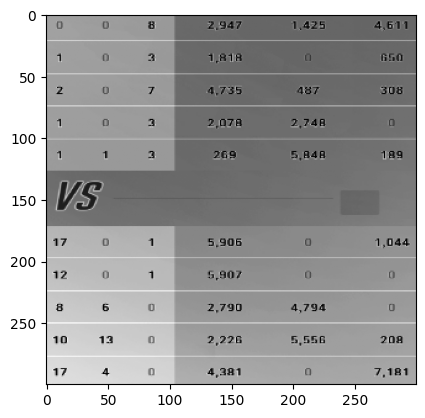

In [16]:
from matplotlib.pyplot import imshow, show

imshow(X[0], 'binary')
show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(ndarray_png.reshape(-1, 1)).reshape(-1, 300, 300, 1)
int_outputs = 210
y = frame_column.values.reshape(-1, int_outputs).T
int_slice = -10
X_train, tuple_y_train = X[:int_slice], tuple(y[:, :int_slice])
X_valid, tuple_y_valid = X[int_slice:], tuple(y[:, int_slice:])
X_train.shape, len(tuple_y_train), X_valid.shape, len(tuple_y_valid)

((889, 300, 300, 1), 210, (10, 300, 300, 1), 210)

In [9]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

X_shape = X_train.shape[1:]

In [26]:
clear_session()
inputs = Input(X_shape)
flatten = Flatten()(inputs)
dense_1 = Dense(300, 'relu')(flatten)
dense_2 = Dense(100, 'relu')(dense_1)
outputs = tuple(Dense(10, 'softmax', name=f'dense_3_{i}')(dense_2) for i in range(1, int_outputs + 1))
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 90000)     │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 300)       │ 27,000,300 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 100)       │     30,100 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_1 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_2 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_3 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_4 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_5 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_6 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_7 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_8 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_9 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_10 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_11 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_12 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_13 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_14 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_15 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_16 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_17 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_18 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_19 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_20 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 27,242,500 (103.92 MB)

 Trainable params: 27,242,500 (103.92 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import Callback
from numpy import array


class Logger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            f'Epoch {epoch + 1}/{self.params["epochs"]}' +
            f'\nloss: {logs["loss"]:.4f}' +
            f' - accuracy: {array([logs[f"dense_3_{i}_accuracy"] for i in range(1, int_outputs + 1)]).mean():.4f}' +
            f' - val_loss: {logs["val_loss"]:.4f}' +
            f' - val_accuracy: {array([logs[f"val_dense_3_{i}_accuracy"] for i in range(1, int_outputs + 1)]).mean():.4f}'
        )

In [28]:
model.compile('SGD', 'sparse_categorical_crossentropy', metrics=['accuracy'] * int_outputs)
history = model.fit(
    X_train,
    tuple_y_train,
    epochs=1000,
    verbose=0,
    callbacks=(EarlyStopping(patience=10, restore_best_weights=True), Logger()),
    validation_data=(X_valid, tuple_y_valid)
)

2025-09-28 07:37:04.954034: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:04.963266: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:05.198257: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:05.235718: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:05.237724: I extern

Epoch 1/1000
loss: 842547986432.0000 - accuracy: 0.2901 - val_loss: 461.0714 - val_accuracy: 0.3181
Epoch 2/1000
loss: 446.5577 - accuracy: 0.3421 - val_loss: 433.7435 - val_accuracy: 0.3571
Epoch 3/1000
loss: 402.9878 - accuracy: 0.3886 - val_loss: 373.7462 - val_accuracy: 0.4124
Epoch 4/1000
loss: 352.2129 - accuracy: 0.4315 - val_loss: 344.7107 - val_accuracy: 0.4248
Epoch 5/1000
loss: 335.7769 - accuracy: 0.4371 - val_loss: 337.0344 - val_accuracy: 0.4219
Epoch 6/1000
loss: 330.0737 - accuracy: 0.4389 - val_loss: 334.0575 - val_accuracy: 0.4181
Epoch 7/1000
loss: 327.5916 - accuracy: 0.4394 - val_loss: 332.8746 - val_accuracy: 0.4181
Epoch 8/1000
loss: 326.4442 - accuracy: 0.4395 - val_loss: 332.0260 - val_accuracy: 0.4190
Epoch 9/1000
loss: 325.8358 - accuracy: 0.4399 - val_loss: 331.3776 - val_accuracy: 0.4219
Epoch 10/1000
loss: 325.4693 - accuracy: 0.4393 - val_loss: 331.3204 - val_accuracy: 0.4181
Epoch 11/1000
loss: 325.2470 - accuracy: 0.4394 - val_loss: 331.2391 - val_accur

In [29]:
y_proba = array(model.predict(X_valid[:1])).argmax(2).reshape(10, 21)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[1, 6, 0, 3, 0, 5, 0, 6, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 1, 7, 2],
       [1, 2, 0, 0, 0, 6, 0, 7, 6, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 4, 0, 0, 0, 8, 0, 9, 5, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 4, 0, 5, 0, 3, 1, 4, 0, 0, 8, 1, 7, 6, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 6, 0, 2, 0, 0, 0, 0, 5, 6, 3, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 0, 5, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 5, 6, 3, 4],
       [1, 5, 0, 0, 0, 8, 0, 6, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 7, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 1, 8, 0, 5, 0, 3, 0, 0, 0, 0, 6, 4, 4, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 6, 0, 2, 0, 0, 0, 0, 6, 8, 7, 3, 0, 0, 0, 0, 0]])

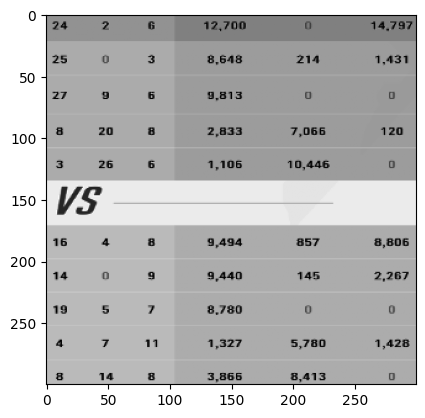

In [30]:
imshow(X_valid[0], 'binary')
show()

In [31]:
array(tuple_y_valid)[:, 0].reshape(10, 21)

array([[2, 4, 0, 2, 0, 6, 1, 2, 7, 0, 0, 0, 0, 0, 0, 0, 1, 4, 7, 9, 7],
       [2, 5, 0, 0, 0, 3, 0, 8, 6, 4, 8, 0, 0, 2, 1, 4, 0, 1, 4, 3, 1],
       [2, 7, 0, 9, 0, 6, 0, 9, 8, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 2, 0, 0, 8, 0, 2, 8, 3, 3, 0, 7, 0, 6, 6, 0, 0, 1, 2, 0],
       [0, 3, 2, 6, 0, 6, 0, 1, 1, 0, 6, 1, 0, 4, 4, 6, 0, 0, 0, 0, 0],
       [1, 6, 0, 4, 0, 8, 0, 9, 4, 9, 4, 0, 0, 8, 5, 7, 0, 8, 8, 0, 6],
       [1, 4, 0, 0, 0, 9, 0, 9, 4, 4, 0, 0, 0, 1, 4, 5, 0, 2, 2, 6, 7],
       [1, 9, 0, 5, 0, 7, 0, 8, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 7, 1, 1, 0, 1, 3, 2, 7, 0, 5, 7, 8, 0, 0, 1, 4, 2, 8],
       [0, 8, 1, 4, 0, 8, 0, 3, 8, 6, 6, 0, 8, 4, 1, 3, 0, 0, 0, 0, 0]])

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

clear_session()
input_ = Input(X_shape)
conv_2d_1 = Conv2D(64, 7, padding='same', activation='relu', kernel_initializer='HeNormal')(input_)
max_pool_2d_1 = MaxPool2D()(conv_2d_1)
conv_2d_2 = Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(max_pool_2d_1)
conv_2d_3 = Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(conv_2d_2)
max_pool_2d_2 = MaxPool2D()(conv_2d_3)
conv_2d_4 = Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(max_pool_2d_2)
conv_2d_5 = Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(conv_2d_4)
max_pool_2d_3 = MaxPool2D()(conv_2d_5)
flatten = Flatten()(max_pool_2d_3)
dense_1 = Dense(128, 'relu', kernel_initializer='HeNormal')(flatten)
dropout_1 = Dropout(.5)(dense_1)
dense_2 = Dense(64, 'relu', kernel_initializer='HeNormal')(dropout_1)
dropout_2 = Dropout(.5)(dense_2)
dense_3 = [Dense(10, 'softmax', name=f'dense_3_{i}')(dropout_2) for i in range(1, int_outputs + 1)]
model = Model(inputs=input_, outputs=dense_3)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 300, 300,  │      3,200 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 150, 150,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 150, 150,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 150, 150,  │    147,584 │ conv2d_1[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 75, 75,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 75, 75,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 75, 75,    │    590,080 │ conv2d_3[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 37, 37,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 350464)    │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 44,859,520 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_1 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_2 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_3 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_4 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_5 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_6 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_7 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_8 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 46,240,308 (176.39 MB)

 Trainable params: 46,240,308 (176.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile('nadam', 'sparse_categorical_crossentropy', metrics=['accuracy'] * int_outputs)
history = model.fit(
    X_train,
    tuple_y_train,
    16,
    epochs=1000,
    verbose=0,
    callbacks=(EarlyStopping(patience=10, restore_best_weights=True), Logger()),
    validation_data=(X_valid, tuple_y_valid)
)

Epoch 1/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 2/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 3/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 4/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 5/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 6/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 7/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 8/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 9/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 10/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 11/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543


F0000 00:00:1759046499.642028    7704 bfc_allocator.cc:719] Check failed: h != kInvalidChunkHandle 
